# Chance de sobreviver ao **Titanic**

# Importação das bibliotecas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Carregando os dados.

In [2]:
file_path = "./titanic.csv"
titanic_data = pd.read_csv(file_path)

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Gráfico da idade e sexo dos tripulantes.

### Tipos de Gráficos do Seaborn.

1. **Histograma (`histplot`)**:
   - Um gráfico que representa a distribuição de uma variável contínua, agrupando os dados em bins (intervalos) e mostrando a frequência de cada bin.

2. **Gráfico de Dispersão (`scatterplot`)**:
   - Um gráfico que mostra a relação entre duas variáveis, utilizando pontos para representar observações em um espaço bidimensional.

3. **Gráfico de Barras (`barplot`)**:
   - Um gráfico que apresenta comparações entre categorias, utilizando barras para mostrar a média ou soma de uma variável em relação a uma variável categórica.

### Atributos Comuns

- **data**: 
  - O DataFrame que contém os dados que você deseja visualizar.

- **x, y**: 
  - Variáveis que determinam as posições dos pontos nos eixos x e y, respectivamente.

- **hue**: 
  - Uma variável de agrupamento que aplica cores diferentes aos pontos ou barras, permitindo uma visualização mais intuitiva de categorias. Pode ser categórica (onde cada categoria recebe uma cor distinta) ou numérica (onde a cor varia de acordo com o valor).

- **multiple**: 
  - Este parâmetro se aplica a dados univariados e define como lidar com múltiplos elementos quando o mapeamento semântico cria subconjuntos. As opções são:
    - **“layer”**: Sobrepõe os elementos.
    - **“dodge”**: Coloca os elementos lado a lado.
    - **“stack”**: Empilha os elementos.
    - **“fill”**: Preenche a área total com proporções.

- **shrink**: 
  - Um fator que ajusta a largura de cada barra em relação ao espaço disponível, permitindo personalizar a aparência visual do gráfico. Esse atributo é relevante apenas em gráficos univariados.

<Axes: xlabel='Age', ylabel='Count'>

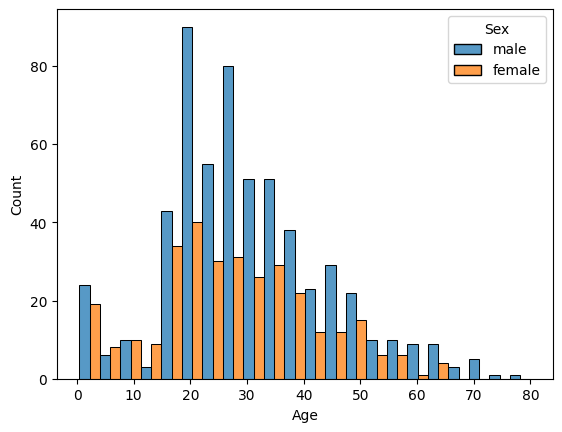

In [3]:
sns.histplot(data=titanic_data, x="Age", hue="Sex", multiple="dodge")

# Número de sobreviventes.

In [4]:
counts = titanic_data['Survived'].value_counts()

survived = counts.get(1, 0)
died = counts.get(0, 0)

result = pd.DataFrame({
    "Survived": [survived],
    "Died": [died],
    "Total": [survived + died]
})

display(result)

,Survived,Died,Total
0,342,545,887


### Explicação do Método `get`

O método `get` em uma série do Pandas permite acessar um valor específico baseado em uma chave (ou índice) e fornece um valor padrão caso essa chave não exista. 

#### Exemplos:

1. **Contagem de Sobreviventes**:
   ```python
   counts.get(1, 0)
   ```
   - **Parâmetro 1**: `1` — O índice que estamos buscando, que representa os sobreviventes.
   - **Parâmetro 2**: `0` — O valor padrão a ser retornado se não houver sobreviventes na série.
   - **Resultado**: Retorna a contagem de sobreviventes. Se não houver sobreviventes, retorna `0`.

2. **Contagem de Falecidos**:
   ```python
   counts.get(0, 0)
   ```
   - **Parâmetro 1**: `0` — O índice que representa os falecidos.
   - **Parâmetro 2**: `0` — O valor padrão para o caso de não haver falecidos.
   - **Resultado**: Retorna a contagem de falecidos. Se não houver falecidos, retorna `0`.

### Resumo

Assim, usando `counts.get(1, 0)` e `counts.get(0, 0)`, você pode facilmente obter as contagens de sobreviventes e falecidos, garantindo que sempre terá um valor retornado, mesmo que não existam registros para aqueles índices. Isso evita erros e facilita a análise dos dados.

# Gráfico de sobreviventes e passageiros mortos por gênero.

<Axes: xlabel='Survived', ylabel='Count'>

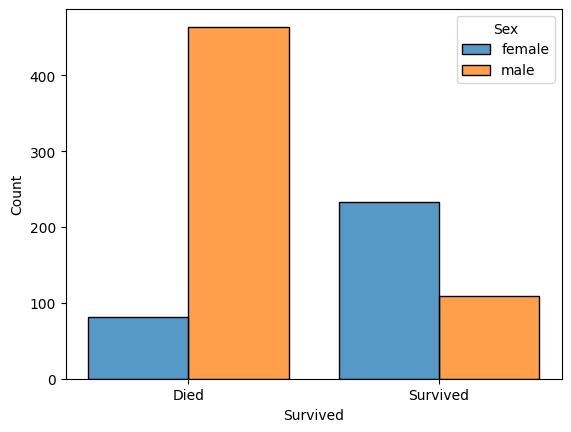

In [5]:
counts_by_gender = titanic_data.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

counts_by_gender['Survived'] = counts_by_gender['Survived'].map({0: 'Died', 1: 'Survived'})

sns.histplot(data=counts_by_gender, x='Survived', hue='Sex', weights='Count', multiple='dodge', shrink=.8)

In [6]:
print("Informações sobre o dataframe:")
titanic_data.info()

print("\nEstatísticas descritivas:")
titanic_data.describe()

Informações sobre o dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB

Estatísticas descritivas:


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Método `isnull()`

O método `isnull()` é utilizado para identificar valores nulos (ou ausentes) em um DataFrame do Pandas. Ele retorna um DataFrame booleano da mesma forma que o original, onde:

- **`True`**: Indica que o valor é nulo (ou seja, `NaN` ou `None`).
- **`False`**: Indica que o valor é presente (não nulo).

### Uso

Para verificar os valores nulos em um DataFrame chamado `titanic_data`, você pode usar:

```python
titanic_data.isnull()
```

### Interpretação do Resultado

- O resultado será um DataFrame com o mesmo número de linhas e colunas que `titanic_data`, mas preenchido com valores booleanos.
- Para cada célula:
  - **`True`**: O valor é nulo.
  - **`False`**: O valor está presente.

### Exemplo de Aplicação

Se você quiser saber a contagem de valores nulos em cada coluna, você pode encadear o método `sum()`:

```python
titanic_data.isnull().sum()
```

Isso retornará uma série com o número de valores nulos para cada coluna, ajudando na identificação de colunas que podem precisar de tratamento adicional, como imputação ou remoção de linhas.

`titanic_data.sum()` -> Retorna a soma de todos os valores de uma coluna ou linha (axis=1)

Por sua vez, `titanic_data.isnull().sum()` -> irá retornar uma tabela com a soma de todos os valores nulos (que faltam)

In [7]:
print("\nValores ausentes:")
titanic_data.isnull().sum()


Valores ausentes:


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

# Pré-processamento dos dados.

`fillna()` -> Preenche valores NA(Not available) e valores NaN utilizando um método específico

`mean()` -> Média dos valores

In [8]:
titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].mean())

titanic_data["Fare"] = titanic_data["Fare"].fillna(titanic_data["Fare"].mean())

Basicamente estamos sobrescrevendo todos elementos **nulos** da coluna "Fare" para a média de toda coluna "Fare"

Porém como nenhum dado estava faltando (ausênte), nenhum dado será substituido.

## Gráfico de idade dos tripulantes

<Axes: xlabel='Age', ylabel='Count'>

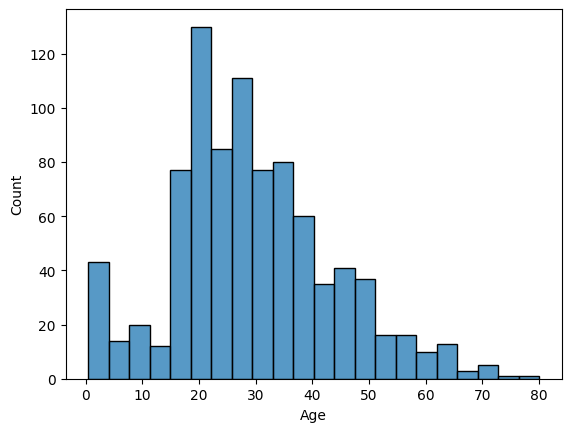

In [9]:
sns.histplot(data=titanic_data, x="Age", multiple="dodge")

## Gráfico de tarifa dos tripulantes.

<Axes: xlabel='Fare', ylabel='Count'>

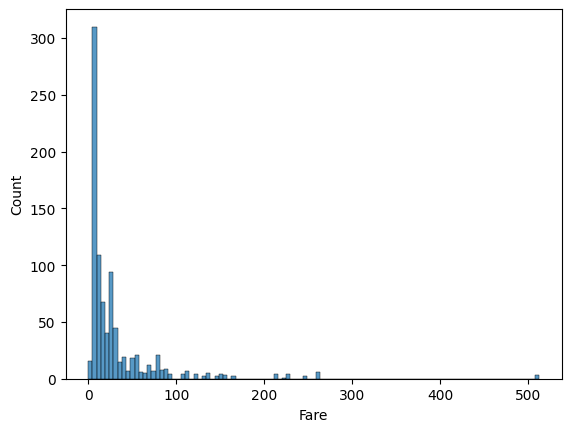

In [10]:
sns.histplot(data=titanic_data, x="Fare", multiple="dodge")

# Mapeando os valores.

`.map()` irá substituir (mapear) os as chaves pelo valor informado no dicionário:

{"male":0, "female":1} -> todo valor de "male" será substituido por 0 e todo valor de "female" será substituido por 1 na coluna "Pclass"


In [11]:
titanic_data["Sex"] = titanic_data["Sex"].map({"male": 0, "female": 1})

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


In [12]:
titanic_data = titanic_data.drop(columns=['Name'])

titanic_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


No contexto do aprendizado de máquina, especialmente ao utilizar a biblioteca Scikit-Learn, é fundamental que todos os dados de entrada sejam representados de forma numérica. Modelos de aprendizado de máquina não podem processar diretamente dados categóricos não numéricos; tentar fazê-lo resultará em erros durante o treinamento.

Além disso, a conversão de variáveis categóricas em números não apenas facilita a compatibilidade com os algoritmos de machine learning, mas também contribui para a escalabilidade do código. Isso é especialmente relevante ao aplicar técnicas de normalização e padronização, que são essenciais para garantir que as variáveis estejam em uma escala adequada e que o modelo possa convergir de maneira eficaz.

Por exemplo, ao transformar a coluna "Sex" em valores binários (0 e 1), garantimos que essa informação categórica possa ser utilizada nos modelos. A coluna "Name", por sua vez, foi removida, uma vez que não fornece informações relevantes para a modelagem e pode introduzir complexidade desnecessária.

Essa abordagem sistemática para a preparação dos dados é crucial para o desenvolvimento de modelos de machine learning robustos e eficientes.

# Definindo as features e target.

**Features** - Características: São as variáveis utilizadas para prever o valor da variável alvo (target)

**Target - Alvo**: Variáveis que estamos tentando prever

In [13]:
X = titanic_data.drop(columns=['Survived'])

y = titanic_data['Survived']

Após o mapeamento dos valores e a preparação do DataFrame `titanic_data`, o próximo passo fundamental é dividir os dados em conjuntos de treino e teste. Nesse contexto:

X representa as **Features** (ou características), que são as variáveis independentes utilizadas para fazer previsões. Estas são as informações que o modelo usará para aprender padrões e realizar previsões.

Y corresponde ao **Target** (ou variável alvo), que é a variável dependente que estamos tentando prever. No caso do conjunto de dados Titanic, isso geralmente se refere à coluna que indica se um passageiro sobreviveu ou não.

Essa divisão é crucial, pois permite avaliar o desempenho do modelo em dados que não foram utilizados durante o treinamento, ajudando a evitar overfitting e garantindo que o modelo generalize bem para novas observações.

A divisão dos dados pode ser realizada utilizando a função train_test_split do Scikit-Learn, que facilita esse processo, garantindo que os conjuntos de treino e teste sejam gerados de forma aleatória e representativa.



# Dividir os dados de treino e teste.

`test_size` -> Define a porcentagem de dados que serão reservados para o conjunto de teste (20%).

`random_state` -> Apenas um número aleatório que servirá como uma **seed** para a aleatoriedade da divisão dos dados.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_split retorna 4 valores que respectivamente serão atribuidos às variáveis X_train, X_test, y_train, y_test

como isso funciona?

**Exemplo:**

```python
def calcular_valores(numero):
    return numero, numero * 2, numero * 3

valor, dobro, triplo = calcular_valores(5)
```

# Construindo e treinando modelos.



## Regressão logística.

In [15]:
log_reg = LogisticRegression(max_iter=200)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Árvore de decisão.

In [16]:
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

# Avaliação dos modelos.

## Regressão logística.

In [17]:
y_pred_log_reg = log_reg.predict(X_test)

log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_prec = precision_score(y_test, y_pred_log_reg)
log_reg_rec = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)

print("Regressão Logística:")
print(f"Acurácia: {log_reg_acc:.4f}")
print(f"Precisão: {log_reg_prec:.4f}")
print(f"Recall: {log_reg_rec:.4f}")
print(f"F1-Score: {log_reg_f1:.4f}")


Regressão Logística:
Acurácia: 0.7528
Precisão: 0.7255
Recall: 0.5522
F1-Score: 0.6271


## Árvore de decisão.

In [18]:
y_pred_decision_tree = decision_tree.predict(X_test)

decision_tree_acc = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_prec = precision_score(y_test, y_pred_decision_tree)
decision_tree_rec = recall_score(y_test, y_pred_decision_tree)
decision_tree_f1 = f1_score(y_test, y_pred_decision_tree)

print("\nÁrvore de Decisão:")
print(f"Acurácia: {decision_tree_acc:.4f}")
print(f"Precisão: {decision_tree_prec:.4f}")
print(f"Recall: {decision_tree_rec:.4f}")
print(f"F1-Score: {decision_tree_f1:.4f}")



Árvore de Decisão:
Acurácia: 0.7921
Precisão: 0.7885
Recall: 0.6119
F1-Score: 0.6891


# Aprimorando o modelo escolhido.

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [ None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)

best_decision_tree = grid_search.best_estimator_

y_pred_best_tree = best_decision_tree.predict(X_test)
best_tree_acc = accuracy_score(y_test, y_pred_best_tree)
best_tree_prec = precision_score(y_test, y_pred_best_tree)
best_tree_rec = recall_score(y_test, y_pred_best_tree)
best_tree_f1 = f1_score(y_test, y_pred_best_tree)

print("\nÁrvore de Decisão Ajustada:")
print(f"Acurácia: {best_tree_acc:.4f}")
print(f"Precisão: {best_tree_prec:.4f}")
print(f"Recall: {best_tree_rec:.4f}")
print(f"F1-Score: {best_tree_f1:.4f}")


Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

Árvore de Decisão Ajustada:
Acurácia: 0.8034
Precisão: 0.7581
Recall: 0.7015
F1-Score: 0.7287


# Usando o modelo.

In [20]:
test_data = pd.read_csv('titanic.csv')

passenger_names = test_data['Name']

test_data.drop(columns=['Name'], inplace=True)

test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].mean())
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})

if 'Survived' in test_data.columns:
    test_data.drop(columns=['Survived'], inplace=True)

predictions = best_decision_tree.predict(test_data)

submission_df = pd.DataFrame({'Name': passenger_names, 'Sex': test_data['Sex'], 'Survived': predictions, 'Age': test_data['Age'], 'Pclass': test_data['Pclass'], 'Fare': test_data['Fare']})

submission_df["Survived"] = submission_df["Survived"].map({1: "Sobreviveu", 0: "Morreu"})
submission_df["Sex"] = submission_df["Sex"].map({0: "Homem", 1: "Mulher"})

submission_df.to_csv('resultado.csv', index=False)

# Análise dos dados obtidos pelo modelo.
Vale ressaltar que esta análise foi feita em base as predições do modelo.

## Gráfico de tripulantes por classe.

<Axes: xlabel='Survived', ylabel='Count'>

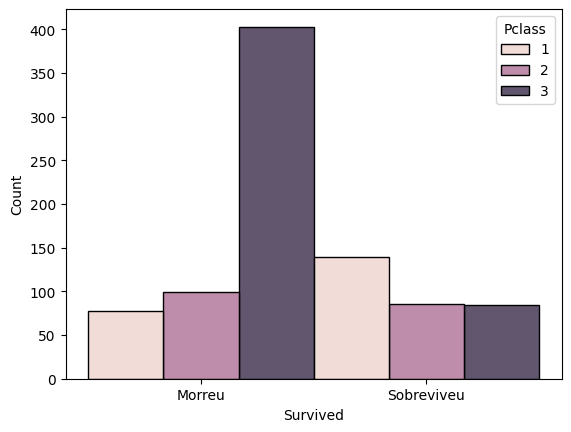

In [21]:
analisys_data = pd.read_csv('results.csv')

sns.histplot(data=analisys_data, x="Survived", hue="Pclass", multiple="dodge")

In [22]:
filtered_data = analisys_data[(analisys_data['Survived'] == 'Morreu') & (analisys_data['Pclass'] == 3)]
print("Número de tripulantes que morreram e que pertenciam à 3 classe: ", end="")
print(filtered_data["Pclass"].value_counts().get(3, "Não encontrado"))

Número de tripulantes que morreram e que pertenciam à 3 classe: 403


## Gráfico de crianças por gênero.

<Axes: xlabel='Survived', ylabel='Count'>

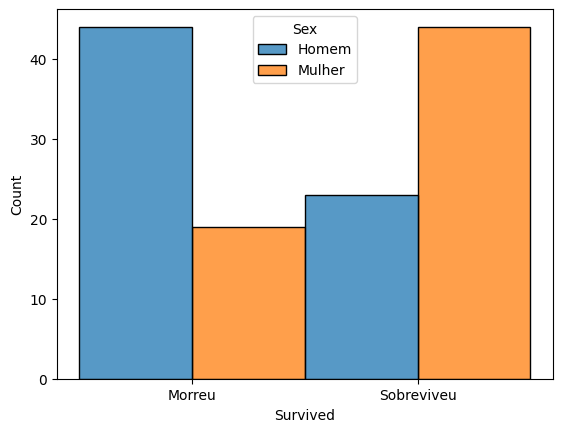

In [23]:
children = analisys_data[(analisys_data["Age"] < 18.0)]
children = children.drop(columns=["Name", "Pclass", "Fare"])
sns.histplot(data=children, x="Survived", hue="Sex", multiple="dodge")

In [24]:
counts_by_gender

,Sex,Survived,Count
0,female,Died,81
1,female,Survived,233
2,male,Died,464
3,male,Survived,109


In [25]:
analisys_data = analisys_data.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
counts_by_gender['Survived'] = counts_by_gender['Survived'].map({"Died": "Morreu", "Survived": "Sobreviveu"})
counts_by_gender['Sex'] = counts_by_gender['Sex'].map({"male": "Homem", "female": "Mulher"})

analisys_data = analisys_data.rename(columns={"Sex": "Sex_post_model", "Survived": "Survived_post_model", "Count": "Count_post_model"})

In [26]:
analisys_data

,Sex_post_model,Survived_post_model,Count_post_model
0,Homem,Morreu,508
1,Homem,Sobreviveu,65
2,Mulher,Morreu,71
3,Mulher,Sobreviveu,243


In [27]:
counts_by_gender

,Sex,Survived,Count
0,Mulher,Morreu,81
1,Mulher,Sobreviveu,233
2,Homem,Morreu,464
3,Homem,Sobreviveu,109
